#  Multiprocessing
- different address space(VM)
- program variable are not shared btween processes.
- use IPC 

In [3]:
import time 

import multiprocessing 


In [10]:
def cal_square(numbers):
    for n in numbers:
        time.sleep(0.4)
        print("square {} ".format(n*n))
        
def cal_cube(numbers):
    for n in numbers:
        time.sleep(0.4)
        print ("square {}".format(n*n*n))
        
if __name__ == "__main__":
    arr = [2,3,0,9]
    p1 = multiprocessing.Process(target=cal_square, args=(arr,))
    p2 = multiprocessing.Process(target=cal_cube, args=(arr,)) 
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()

square 8
square 4 
square 27
square 9 
square 0
square 0 
square 729
square 81 


In [11]:
square_list = []
def cal_square(numbers):
    global square_list
    for n in numbers:
        time.sleep(0.4)
        print ("square {}".format(n*n))
        square_list.append(n*n)
    print("with in a process: result "+ str(square_list))
        
        
if __name__ == "__main__":
    arr = [2,3,8,9]
    p1 = multiprocessing.Process(target=cal_square, args=(arr,))
    
    p1.start()   
    p1.join()
    
   
    print("squares list " + str(square_list))
    print ("done")

square 4
square 9
square 64
square 81
with in a process: result [4, 9, 64, 81]
squares list []
done


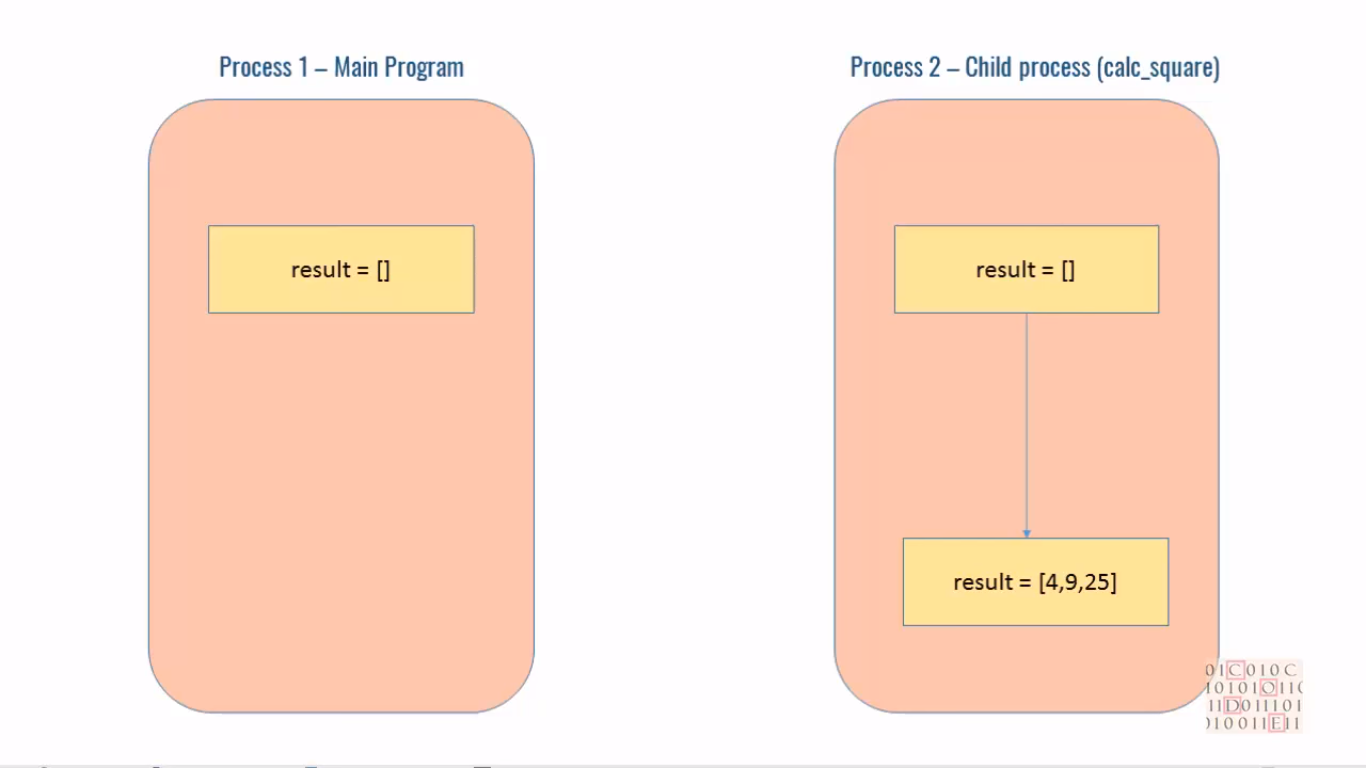

# Sharing memory variable, (Array)

In [5]:
import multiprocessing

def cal_square(numbers,result):

    for idx , n in enumerate(numbers):
        result[idx] = n*n
        
if __name__ == "__main__":
    arr = [2,3,5]
    result = multiprocessing.Array('i',3)   #i = integer , d = double
    p1 = multiprocessing.Process(target=cal_square, args=(arr,result))
    
    p1.start()   
    p1.join()
    
   
    print(result[:])

[4, 9, 25]
